# 주피터 노트북(파이썬)에서 실시간 온도 데이타를 SQL에 저장하고 시계열분석하기

<img src="https://raw.githubusercontent.com/leehaesung/SQLite3_with_LTE_CatM1/master/01_Images/01_Setting.png" height="500" width="550" >

<img src="https://raw.githubusercontent.com/leehaesung/SQLite3_with_LTE_CatM1/master/01_Images/Figure_1.png" height="500" width="450" >

* How to install Paho-MQTT on Linux/Mac :
```
sudo pip install paho-mqtt
```

* How to install SQLite3 on Linux/Mac:
```
sudo apt-get update
sudo apt-get install sqlite3 libsqlite3-dev
```

In [1]:
!pip install paho-mqtt

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Eclipse Paho™ MQTT Python Pub/Sub Client

In [1]:
import sys
import json

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

topics = ['catm1topic']

m = subscribe.simple(topics, hostname="broker.hivemq.com", retained=False, msg_count=2)
for a in m:
    print(a.topic)
    print(a.payload)
    da = json.loads(a.payload)
    print(da)
    json_data = da["temperature"]
    print(json_data)

catm1topic
b'{"device":"catm1","temperature":"24.730"}'
{'device': 'catm1', 'temperature': '24.730'}
24.730
catm1topic
b'{"device":"catm1","temperature":"25.206"}'
{'device': 'catm1', 'temperature': '25.206'}
25.206


## DROP TABLE
#### 생략하고 진행 혹은 필요시만

* SQLite <b>DROP TABLE</b> statement is used to <b>remove</b> a table definition and all associated data, indexes, triggers, constraints, and permission specifications for that table.

In [2]:
import sqlite3
conn = sqlite3.connect('sqliteLTECatM1')
cur = conn.cursor()
sql = "DROP TABLE HOME;"
cur.execute(sql)
print("Deleted the table successfully");
conn.commit()
conn.close()

Deleted the table successfully


## CREATE TABLE

* SQLite <b>CREATE TABLE</b> statement is used to <b>create</b> a new table in any of the given database. Creating a basic table involves naming the table and defining its columns and each column's data type.

In [29]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
conn.execute('''CREATE TABLE HOME(
    LOCAL INT PRIMARY KEY NOT NULL, 
    TEMP INT NOT NULL
    );''')
print("Table created successfully");

conn.close()

Table created successfully


## INSERT QUERY FOR UNIT TESTING

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [6]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

conn.execute("INSERT INTO HOME (LOCAL,TEMP) \
      VALUES (20190604033350, 24)");

conn.commit()
print("Records created successfully");
conn.close()

Opened database successfully
Records created successfully


## SEARCH THE SPECIFIC TEMPERATURE DATA

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [7]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print("Local Time   = ", row[0])
    print("Temperature  = ", row[1])
    print("\n")
   

print("Operation done successfully");
conn.close()

Opened database successfully
Local Time   =  20190604033350
Temperature  =  24


Operation done successfully


In [10]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteLTECatM1');
print("Opened database successfully");
print("");
print("     Date       | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print(row[0]," | ",row[1])
    
conn.close()

Opened database successfully

     Date       | Temperature[°C]:
20190604033350  |  24


### Searching Temperature Data

In [13]:
import sqlite3

def search_temperature(temp):
    conn = sqlite3.connect('sqliteLTECatM1')

    str1 = "SELECT * FROM HOME WHERE TEMP = "
    str2 = str(temp)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print("Opened database successfully")
    print("")
    print("     Date       | Temperature[°C]:")
    print("==================================")
    
    for row in cursor:
        print(row[0]," | ",row[1])

In [14]:
# Put any temperature.
search_temperature(24)

Opened database successfully

     Date       | Temperature[°C]:
20190604033350  |  24


## DELETE QUERY

* SQLite <b>DELETE QUERY</b> is used to <b>delete</b> the existing records from a table. You can use WHERE clause with <b>DELETE QUERY</b> to <b>delete</b> the selected rows, otherwise all the records would be deleted.

In [15]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

conn.execute("DELETE from HOME where LOCAL = 20190604033350;")
#conn.execute("DELETE FROM HOME WHERE TIME BETWEEN 1514283551781 AND 1514285943367;")
conn.commit()
print("Total number of rows deleted :", conn.total_changes)

print("")
print("    Date      | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME")
for row in cursor:
    print(row[0],row[1])

print("DELETE Operation done successfully")
conn.close()

Opened database successfully
Total number of rows deleted : 1

    Date      | Temperature[°C]:
DELETE Operation done successfully


##  INSERT QUERY (IN REAL TIME)
#### 종료하기위해서는 저장한후에 주피터를 실행했던 터미널 커맨드창에서 Ctrl + C 누릅니다.  다시 주피터를 열어주세요.

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [ ]:
import sys 
import sqlite3
import locale
import json
import datetime

conn = sqlite3.connect('sqliteLTECatM1')
conn.execute('''CREATE TABLE HOME(
    LOCAL INT PRIMARY KEY NOT NULL, 
    TEMP INT NOT NULL
    );''')
print("Table created successfully");
conn.close()

conn = sqlite3.connect('sqliteLTECatM1')
print("Database opend successfully")
print("")
print("INSERT OPERATION")
print("     Date       | Temperature[°C]:")
print("==================================")

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    #print("%s : %s" % (message.topic, message.payload))
    data = message.payload
    # {"device":"catm1","temperature":"29.011"}
    local = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
       
    jsonData = json.loads(data)
    temp = str(jsonData['temperature'])         
    
    print(local," | ",temp)
    
    str1 = "INSERT INTO HOME (LOCAL,TEMP) \
      VALUES ("
    str2 = local 
    str3 = ", "
    str4 = temp
    str5 = " )"
    insert = str1 + str2 + str3 + str4 + str5
    conn.execute(insert)
    conn.commit()

subscribe.callback(print_msg, "catm1topic", hostname="broker.hivemq.com")

Table created successfully
Database opend successfully

INSERT OPERATION
     Date       | Temperature[°C]:
20190604205814  |  25.206
20190604205822  |  25.206
20190604205829  |  25.206
20190604205837  |  26.157
20190604205844  |  24.255
20190604205851  |  26.157
20190604205859  |  25.682
20190604205906  |  26.157
20190604205914  |  24.255
20190604205921  |  24.730
20190604205929  |  25.682
20190604205936  |  26.157
20190604205944  |  25.682
20190604205951  |  26.633
20190604205959  |  24.730
20190604210006  |  26.633
20190604210013  |  26.633
20190604210021  |  24.730
20190604210028  |  24.730
20190604210036  |  26.157
20190604210043  |  26.157
20190604210051  |  26.157
20190604210058  |  24.730
20190604210106  |  26.157
20190604210113  |  26.157
20190604210120  |  26.157
20190604210128  |  26.633
20190604210135  |  27.108
20190604210143  |  24.730
20190604210150  |  25.682
20190604210158  |  26.157
20190604210205  |  27.108
20190604210212  |  26.157
20190604210220  |  25.682
20190604

## SELECT QUERY

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [1]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")
print("     Date       | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    print(row[0]," | ",row[1])
    
conn.close()

Opened database successfully

     Date       | Temperature[°C]:
20190604205814  |  25.206
20190604205822  |  25.206
20190604205829  |  25.206
20190604205837  |  26.157
20190604205844  |  24.255
20190604205851  |  26.157
20190604205859  |  25.682
20190604205906  |  26.157
20190604205914  |  24.255
20190604205921  |  24.73
20190604205929  |  25.682
20190604205936  |  26.157
20190604205944  |  25.682
20190604205951  |  26.633
20190604205959  |  24.73
20190604210006  |  26.633
20190604210013  |  26.633
20190604210021  |  24.73
20190604210028  |  24.73
20190604210036  |  26.157
20190604210043  |  26.157
20190604210051  |  26.157
20190604210058  |  24.73
20190604210106  |  26.157
20190604210113  |  26.157
20190604210120  |  26.157
20190604210128  |  26.633
20190604210135  |  27.108
20190604210143  |  24.73
20190604210150  |  25.682
20190604210158  |  26.157
20190604210205  |  27.108
20190604210212  |  26.157
20190604210220  |  25.682
20190604210227  |  25.682
20190604210235  |  27.108
20190

## SELECT QUERY & PUSH DATA INTO BOX

In [2]:
import sqlite3

class Stack:
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self, item):
        return self.items.pop(item)

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)


tempBox = Stack()
temPopBox = Stack() 
timeBox = Stack()

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")

cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    tempBox.push(row[1])
    temPopBox.push(row[1])
    
    #print(row[0],row[1],row[2])

# Making time = 1,2,3,4 .... n    
max = len(tempBox.items)

for count in range(1,max+1):
    timeBox.push(count)
print("x(time) = ")    
print(timeBox.items)
print("")
print("y1(Temperature) = ") 
print(tempBox.items)
print("")

xTime = timeBox.items
y1Data = tempBox.items

# Comparing between max and min in tData
highTemBit = y1Data.pop(max-1)
lowTemBit = y1Data.pop(0)


if highTemBit > lowTemBit:
    print("The temperature data is ascending.")

elif highTemBit < lowTemBit:
    print("The temperature data is descending.")
    
elif highTemBit == lowTemBit:
    print("The temperature data is stable.")
    
conn.close()

Opened database successfully

x(time) = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]

y1(Temperature) = 
[25.206, 25.206, 25.206, 26.157, 24.255, 26.157, 25.682, 26.157, 24.255, 24.73, 25.682, 26.157, 25.682, 26.633,

In [3]:
print("Max & Min Temperature:")
print(highTemBit)
print(lowTemBit)

Max & Min Temperature:
29.486
25.206


## Export CSV file

In [1]:
import sqlite3
import csv

sqlconnector = sqlite3.connect('./data/sqliteLTECatM1')
sql3_cursor = sqlconnector.cursor()
sql3_cursor.execute('SELECT * FROM HOME')
with open('temp_catm1.csv','w') as out_csv_file:
  csv_out = csv.writer(out_csv_file)
  # write header                        
  csv_out.writerow([d[0] for d in sql3_cursor.description])
  # write data                          
  for result in sql3_cursor:
    csv_out.writerow(result)
sqlconnector.close()

In [2]:
!ls *.csv

temp_catm1.csv


In [3]:
!cat temp_catm1.csv

In [20]:
# create and evaluate an updated autoregressive model
import pandas as pa
import matplotlib as plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('./data/temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#
# view basic stats information on data
print(series.describe())

count    187.000000
mean      27.406011
std        1.215017
min       24.255000
25%       26.633000
50%       27.584000
75%       28.060000
max       29.962000
Name: TEMP, dtype: float64


In [11]:
#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 

#view top 10 records
series.head(5)

LOCAL
2019-06-04 20:58:14    25.206
2019-06-04 20:58:22    25.206
2019-06-04 20:58:29    25.206
2019-06-04 20:58:37    26.157
2019-06-04 20:58:44    24.255
Name: TEMP, dtype: float64

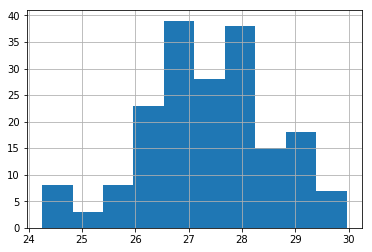

In [21]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('./data/temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

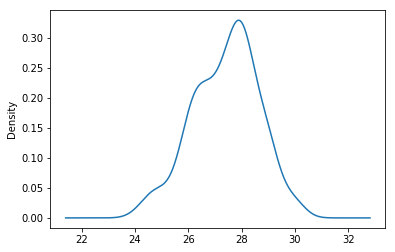

In [22]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('./data/temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
pyplot.show()

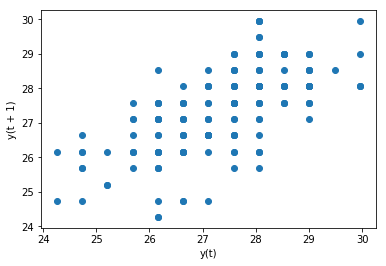

In [23]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [24]:
# correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe
print(result)

          t     t+1
0       NaN  25.206
1    25.206  25.206
2    25.206  25.206
3    25.206  26.157
4    26.157  24.255
5    24.255  26.157
6    26.157  25.682
7    25.682  26.157
8    26.157  24.255
9    24.255  24.730
10   24.730  25.682
11   25.682  26.157
12   26.157  25.682
13   25.682  26.633
14   26.633  24.730
15   24.730  26.633
16   26.633  26.633
17   26.633  24.730
18   24.730  24.730
19   24.730  26.157
20   26.157  26.157
21   26.157  26.157
22   26.157  24.730
23   24.730  26.157
24   26.157  26.157
25   26.157  26.157
26   26.157  26.633
27   26.633  27.108
28   27.108  24.730
29   24.730  25.682
..      ...     ...
157  28.535  29.011
158  29.011  27.584
159  27.584  27.584
160  27.584  27.584
161  27.584  28.535
162  28.535  27.584
163  27.584  29.011
164  29.011  28.060
165  28.060  27.584
166  27.584  29.011
167  29.011  28.060
168  28.060  29.962
169  29.962  28.060
170  28.060  29.962
171  29.962  29.962
172  29.962  28.060
173  28.060  29.962
174  29.962  29.011


### Autocorrelation (자기상관도)

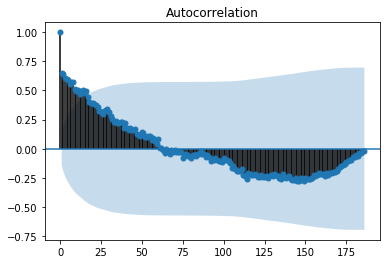

In [25]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('./data/temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_acf(series, lags=186)
pyplot.show()

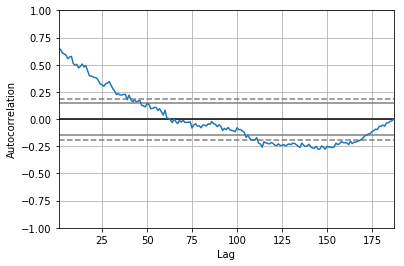

In [26]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('./data/temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

{sensor:25.682000,prediction:24.777291}
{sensor:26.633000,prediction:23.926544}
{sensor:24.730000,prediction:24.790333}
{sensor:26.633000,prediction:24.801885}
{sensor:26.633000,prediction:25.621826}
{sensor:24.730000,prediction:26.026140}
{sensor:24.730000,prediction:24.393889}
{sensor:26.157000,prediction:25.824467}
{sensor:26.157000,prediction:27.005633}
{sensor:26.157000,prediction:25.056364}
{sensor:24.730000,prediction:24.302850}
{sensor:26.157000,prediction:24.884708}
{sensor:26.157000,prediction:25.863827}
{sensor:26.157000,prediction:25.839102}
{sensor:26.633000,prediction:24.725133}
{sensor:27.108000,prediction:25.256555}
{sensor:24.730000,prediction:25.481336}
{sensor:25.682000,prediction:24.915406}
{sensor:26.157000,prediction:26.413978}
{sensor:27.108000,prediction:27.139370}
{sensor:26.157000,prediction:25.392312}
{sensor:25.682000,prediction:24.714857}
{sensor:25.682000,prediction:25.259587}
{sensor:27.108000,prediction:26.293330}
{sensor:26.633000,prediction:26.470724}


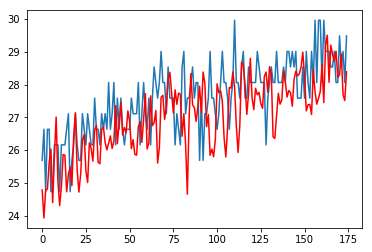

In [27]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('./data/temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split dataset
X = series.values
testLength = 175;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('{sensor:%f,prediction:%f}' % (obs, yhat))
rmse = sqrt(mean_squared_error(test, predictions))

print('{TestRMSE:%.3f}' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 0.994


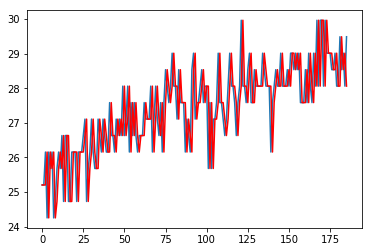

In [28]:
# evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('./data/temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
testLength = 186;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

# RNN For Beginners on Keras

## Load libraries and set global options

In [1]:
from pandas import read_csv 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df1 = read_csv('./data/temp_catm1.csv')
df1.head(100)

,LOCAL,TEMP
0,20190604205814,25.206
1,20190604205822,25.206
2,20190604205829,25.206
3,20190604205837,26.157
4,20190604205844,24.255
5,20190604205851,26.157
6,20190604205859,25.682
7,20190604205906,26.157
8,20190604205914,24.255
9,20190604205921,24.730


In [3]:
df = read_csv('./data/temp_catm1.csv', usecols=[1])
df.describe()

,TEMP
count,187.000000
mean,27.406011
std,1.215017
min,24.255000
25%,26.633000
50%,27.584000
75%,28.060000
max,29.962000


In [4]:
df.head()

,TEMP
0,25.206
1,25.206
2,25.206
3,26.157
4,24.255


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 1 columns):
TEMP    187 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB


In [6]:
df.columns

Index(['TEMP'], dtype='object')

In [7]:
Temp_data = df['TEMP']

In [8]:
Temp_data

0      25.206
1      25.206
2      25.206
3      26.157
4      24.255
5      26.157
6      25.682
7      26.157
8      24.255
9      24.730
10     25.682
11     26.157
12     25.682
13     26.633
14     24.730
15     26.633
16     26.633
17     24.730
18     24.730
19     26.157
20     26.157
21     26.157
22     24.730
23     26.157
24     26.157
25     26.157
26     26.633
27     27.108
28     24.730
29     25.682
        ...  
157    29.011
158    27.584
159    27.584
160    27.584
161    28.535
162    27.584
163    29.011
164    28.060
165    27.584
166    29.011
167    28.060
168    29.962
169    28.060
170    29.962
171    29.962
172    28.060
173    29.962
174    29.011
175    29.011
176    29.011
177    28.535
178    28.535
179    29.011
180    28.060
181    28.060
182    29.486
183    28.535
184    29.011
185    28.060
186    29.486
Name: TEMP, Length: 187, dtype: float64

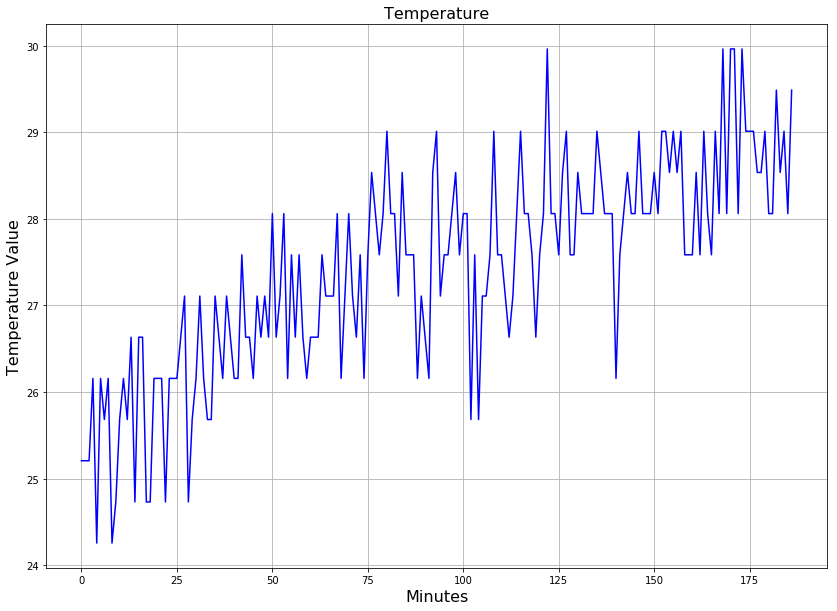

In [9]:
plt.figure(figsize=(14,10))                 # Visualizing the data
plt.plot(Temp_data,c="blue")
plt.title("Temperature",fontsize=16)
plt.xlabel("Minutes",fontsize=16)
plt.ylabel("Temperature Value",fontsize=16)
plt.grid()
plt.show()

In [10]:
values = df.values.astype('float32')
values

array([[25.206],
       [25.206],
       [25.206],
       [26.157],
       [24.255],
       [26.157],
       [25.682],
       [26.157],
       [24.255],
       [24.73 ],
       [25.682],
       [26.157],
       [25.682],
       [26.633],
       [24.73 ],
       [26.633],
       [26.633],
       [24.73 ],
       [24.73 ],
       [26.157],
       [26.157],
       [26.157],
       [24.73 ],
       [26.157],
       [26.157],
       [26.157],
       [26.633],
       [27.108],
       [24.73 ],
       [25.682],
       [26.157],
       [27.108],
       [26.157],
       [25.682],
       [25.682],
       [27.108],
       [26.633],
       [26.157],
       [27.108],
       [26.633],
       [26.157],
       [26.157],
       [27.584],
       [26.633],
       [26.633],
       [26.157],
       [27.108],
       [26.633],
       [27.108],
       [26.633],
       [28.06 ],
       [26.633],
       [27.108],
       [28.06 ],
       [26.157],
       [27.584],
       [26.633],
       [27.584],
       [26.633

In [11]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [12]:
train

array([[25.206],
       [25.206],
       [25.206],
       [26.157],
       [24.255],
       [26.157],
       [25.682],
       [26.157],
       [24.255],
       [24.73 ],
       [25.682],
       [26.157],
       [25.682],
       [26.633],
       [24.73 ],
       [26.633],
       [26.633],
       [24.73 ],
       [24.73 ],
       [26.157],
       [26.157],
       [26.157],
       [24.73 ],
       [26.157],
       [26.157],
       [26.157],
       [26.633],
       [27.108],
       [24.73 ],
       [25.682],
       [26.157],
       [27.108],
       [26.157],
       [25.682],
       [25.682],
       [27.108],
       [26.633],
       [26.157],
       [27.108],
       [26.633],
       [26.157],
       [26.157],
       [27.584],
       [26.633],
       [26.633],
       [26.157],
       [27.108],
       [26.633],
       [27.108],
       [26.633],
       [28.06 ],
       [26.633],
       [27.108],
       [28.06 ],
       [26.157],
       [27.584],
       [26.633],
       [27.584],
       [26.633

In [13]:
test

array([[27.584],
       [28.535],
       [29.011],
       [27.584],
       [27.584],
       [28.535],
       [28.06 ],
       [28.06 ],
       [28.06 ],
       [28.06 ],
       [29.011],
       [28.535],
       [28.06 ],
       [28.06 ],
       [28.06 ],
       [26.157],
       [27.584],
       [28.06 ],
       [28.535],
       [28.06 ],
       [28.06 ],
       [29.011],
       [28.06 ],
       [28.06 ],
       [28.06 ],
       [28.535],
       [28.06 ],
       [29.011],
       [29.011],
       [28.535],
       [29.011],
       [28.535],
       [29.011],
       [27.584],
       [27.584],
       [27.584],
       [28.535],
       [27.584],
       [29.011],
       [28.06 ],
       [27.584],
       [29.011],
       [28.06 ],
       [29.962],
       [28.06 ],
       [29.962],
       [29.962],
       [28.06 ],
       [29.962],
       [29.011],
       [29.011],
       [29.011],
       [28.535],
       [28.535],
       [29.011],
       [28.06 ],
       [28.06 ],
       [29.486],
       [28.535

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [15]:
train

array([[0.16663742],
       [0.16663742],
       [0.16663742],
       [0.33327484],
       [0.        ],
       [0.33327484],
       [0.25004387],
       [0.33327484],
       [0.        ],
       [0.08323097],
       [0.25004387],
       [0.33327484],
       [0.25004387],
       [0.4166813 ],
       [0.08323097],
       [0.4166813 ],
       [0.4166813 ],
       [0.08323097],
       [0.08323097],
       [0.33327484],
       [0.33327484],
       [0.33327484],
       [0.08323097],
       [0.33327484],
       [0.33327484],
       [0.33327484],
       [0.4166813 ],
       [0.49991226],
       [0.08323097],
       [0.25004387],
       [0.33327484],
       [0.49991226],
       [0.33327484],
       [0.25004387],
       [0.25004387],
       [0.49991226],
       [0.4166813 ],
       [0.33327484],
       [0.49991226],
       [0.4166813 ],
       [0.33327484],
       [0.33327484],
       [0.5833187 ],
       [0.4166813 ],
       [0.4166813 ],
       [0.33327484],
       [0.49991226],
       [0.416

In [16]:
test

array([[0.5833187 ],
       [0.74995613],
       [0.8333626 ],
       [0.5833187 ],
       [0.5833187 ],
       [0.74995613],
       [0.66672516],
       [0.66672516],
       [0.66672516],
       [0.66672516],
       [0.8333626 ],
       [0.74995613],
       [0.66672516],
       [0.66672516],
       [0.66672516],
       [0.33327484],
       [0.5833187 ],
       [0.66672516],
       [0.74995613],
       [0.66672516],
       [0.66672516],
       [0.8333626 ],
       [0.66672516],
       [0.66672516],
       [0.66672516],
       [0.74995613],
       [0.66672516],
       [0.8333626 ],
       [0.8333626 ],
       [0.74995613],
       [0.8333626 ],
       [0.74995613],
       [0.8333626 ],
       [0.5833187 ],
       [0.5833187 ],
       [0.5833187 ],
       [0.74995613],
       [0.5833187 ],
       [0.8333626 ],
       [0.66672516],
       [0.5833187 ],
       [0.8333626 ],
       [0.66672516],
       [1.        ],
       [0.66672516],
       [1.        ],
       [1.        ],
       [0.666

In [17]:
train.shape[0],test.shape[0]

(125, 62)

In [18]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [19]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
trainX

array([[0.16663742, 0.16663742, 0.16663742, ..., 0.08323097, 0.25004387,
        0.33327484],
       [0.16663742, 0.16663742, 0.33327484, ..., 0.25004387, 0.33327484,
        0.25004387],
       [0.16663742, 0.33327484, 0.        , ..., 0.33327484, 0.25004387,
        0.4166813 ],
       ...,
       [0.5833187 , 0.49991226, 0.4166813 , ..., 0.4166813 , 0.5833187 ,
        0.66672516],
       [0.49991226, 0.4166813 , 0.49991226, ..., 0.5833187 , 0.66672516,
        1.        ],
       [0.4166813 , 0.49991226, 0.66672516, ..., 0.66672516, 1.        ,
        0.66672516]], dtype=float32)

In [21]:
trainY

array([0.25004387, 0.4166813 , 0.08323097, 0.4166813 , 0.4166813 ,
       0.08323097, 0.08323097, 0.33327484, 0.33327484, 0.33327484,
       0.08323097, 0.33327484, 0.33327484, 0.33327484, 0.4166813 ,
       0.49991226, 0.08323097, 0.25004387, 0.33327484, 0.49991226,
       0.33327484, 0.25004387, 0.25004387, 0.49991226, 0.4166813 ,
       0.33327484, 0.49991226, 0.4166813 , 0.33327484, 0.33327484,
       0.5833187 , 0.4166813 , 0.4166813 , 0.33327484, 0.49991226,
       0.4166813 , 0.49991226, 0.4166813 , 0.66672516, 0.4166813 ,
       0.49991226, 0.66672516, 0.33327484, 0.5833187 , 0.4166813 ,
       0.5833187 , 0.4166813 , 0.33327484, 0.4166813 , 0.4166813 ,
       0.4166813 , 0.5833187 , 0.49991226, 0.49991226, 0.49991226,
       0.66672516, 0.33327484, 0.49991226, 0.66672516, 0.49991226,
       0.4166813 , 0.5833187 , 0.33327484, 0.5833187 , 0.74995613,
       0.66672516, 0.5833187 , 0.66672516, 0.8333626 , 0.66672516,
       0.66672516, 0.49991226, 0.74995613, 0.5833187 , 0.58331

In [22]:
testX

array([[0.5833187 , 0.74995613, 0.8333626 , 0.5833187 , 0.5833187 ,
        0.74995613, 0.66672516, 0.66672516, 0.66672516, 0.66672516,
        0.8333626 , 0.74995613],
       [0.74995613, 0.8333626 , 0.5833187 , 0.5833187 , 0.74995613,
        0.66672516, 0.66672516, 0.66672516, 0.66672516, 0.8333626 ,
        0.74995613, 0.66672516],
       [0.8333626 , 0.5833187 , 0.5833187 , 0.74995613, 0.66672516,
        0.66672516, 0.66672516, 0.66672516, 0.8333626 , 0.74995613,
        0.66672516, 0.66672516],
       [0.5833187 , 0.5833187 , 0.74995613, 0.66672516, 0.66672516,
        0.66672516, 0.66672516, 0.8333626 , 0.74995613, 0.66672516,
        0.66672516, 0.66672516],
       [0.5833187 , 0.74995613, 0.66672516, 0.66672516, 0.66672516,
        0.66672516, 0.8333626 , 0.74995613, 0.66672516, 0.66672516,
        0.66672516, 0.33327484],
       [0.74995613, 0.66672516, 0.66672516, 0.66672516, 0.66672516,
        0.8333626 , 0.74995613, 0.66672516, 0.66672516, 0.66672516,
        0.33327484,

In [23]:
testY

array([0.66672516, 0.66672516, 0.66672516, 0.33327484, 0.5833187 ,
       0.66672516, 0.74995613, 0.66672516, 0.66672516, 0.8333626 ,
       0.66672516, 0.66672516, 0.66672516, 0.74995613, 0.66672516,
       0.8333626 , 0.8333626 , 0.74995613, 0.8333626 , 0.74995613,
       0.8333626 , 0.5833187 , 0.5833187 , 0.5833187 , 0.74995613,
       0.5833187 , 0.8333626 , 0.66672516, 0.5833187 , 0.8333626 ,
       0.66672516, 1.        , 0.66672516, 1.        , 1.        ,
       0.66672516, 1.        , 0.8333626 , 0.8333626 , 0.8333626 ,
       0.74995613, 0.74995613, 0.8333626 , 0.66672516, 0.66672516,
       0.91659355, 0.74995613, 0.8333626 , 0.66672516, 0.91659355],
      dtype=float32)

In [24]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(113, 12, 1)

In [25]:
trainX

array([[[0.16663742],
        [0.16663742],
        [0.16663742],
        ...,
        [0.08323097],
        [0.25004387],
        [0.33327484]],

       [[0.16663742],
        [0.16663742],
        [0.33327484],
        ...,
        [0.25004387],
        [0.33327484],
        [0.25004387]],

       [[0.16663742],
        [0.33327484],
        [0.        ],
        ...,
        [0.33327484],
        [0.25004387],
        [0.4166813 ]],

       ...,

       [[0.5833187 ],
        [0.49991226],
        [0.4166813 ],
        ...,
        [0.4166813 ],
        [0.5833187 ],
        [0.66672516]],

       [[0.49991226],
        [0.4166813 ],
        [0.49991226],
        ...,
        [0.5833187 ],
        [0.66672516],
        [1.        ]],

       [[0.4166813 ],
        [0.49991226],
        [0.66672516],
        ...,
        [0.66672516],
        [1.        ],
        [0.66672516]]], dtype=float32)

In [26]:
testX

array([[[0.5833187 ],
        [0.74995613],
        [0.8333626 ],
        [0.5833187 ],
        [0.5833187 ],
        [0.74995613],
        [0.66672516],
        [0.66672516],
        [0.66672516],
        [0.66672516],
        [0.8333626 ],
        [0.74995613]],

       [[0.74995613],
        [0.8333626 ],
        [0.5833187 ],
        [0.5833187 ],
        [0.74995613],
        [0.66672516],
        [0.66672516],
        [0.66672516],
        [0.66672516],
        [0.8333626 ],
        [0.74995613],
        [0.66672516]],

       [[0.8333626 ],
        [0.5833187 ],
        [0.5833187 ],
        [0.74995613],
        [0.66672516],
        [0.66672516],
        [0.66672516],
        [0.66672516],
        [0.8333626 ],
        [0.74995613],
        [0.66672516],
        [0.66672516]],

       [[0.5833187 ],
        [0.5833187 ],
        [0.74995613],
        [0.66672516],
        [0.66672516],
        [0.66672516],
        [0.66672516],
        [0.8333626 ],
        [0.74995613],
    

In [27]:
from keras.layers import Dense, SimpleRNN, Dropout,LSTM
from keras.metrics import mean_squared_error
from keras.models import Sequential

Using TensorFlow backend.


In [28]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(look_back, 1)))
model.add(Dense(62))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100,batch_size = 1)

Epoch 1/100
113/113 [==============================] - 0s - loss: 0.0493     
Epoch 2/100
113/113 [==============================] - 0s - loss: 0.0335     
Epoch 3/100
113/113 [==============================] - 0s - loss: 0.0264     
Epoch 4/100
113/113 [==============================] - 0s - loss: 0.0219     
Epoch 5/100
113/113 [==============================] - 0s - loss: 0.0272     
Epoch 6/100
113/113 [==============================] - 0s - loss: 0.0243     
Epoch 7/100
113/113 [==============================] - 0s - loss: 0.0237     
Epoch 8/100
113/113 [==============================] - 0s - loss: 0.0225     
Epoch 9/100
113/113 [==============================] - 0s - loss: 0.0230      
Epoch 10/100
113/113 [==============================] - 0s - loss: 0.0238      
Epoch 11/100
113/113 [==============================] - 0s - loss: 0.0211     
Epoch 12/100
113/113 [==============================] - 0s - loss: 0.0235     
Epoch 13/100
113/113 [==============================] - 0s 

In [29]:
testPredict = model.predict(testX)

In [30]:
testPredict

array([[0.63282895],
       [0.6279136 ],
       [0.6172636 ],
       [0.620467  ],
       [0.57067657],
       [0.59918374],
       [0.6031131 ],
       [0.6185668 ],
       [0.60613775],
       [0.6131089 ],
       [0.63065124],
       [0.6100379 ],
       [0.6268337 ],
       [0.6156557 ],
       [0.6314452 ],
       [0.6142544 ],
       [0.6454891 ],
       [0.6438881 ],
       [0.6370252 ],
       [0.64423   ],
       [0.64065194],
       [0.6503709 ],
       [0.6162771 ],
       [0.62092316],
       [0.6047222 ],
       [0.6306892 ],
       [0.60598314],
       [0.6411228 ],
       [0.6139018 ],
       [0.6063111 ],
       [0.6327277 ],
       [0.62119967],
       [0.66659355],
       [0.61851025],
       [0.6787743 ],
       [0.65404826],
       [0.64517117],
       [0.66343594],
       [0.6573887 ],
       [0.6589442 ],
       [0.647842  ],
       [0.65360796],
       [0.63879806],
       [0.6498197 ],
       [0.6352661 ],
       [0.62836254],
       [0.65343994],
       [0.641

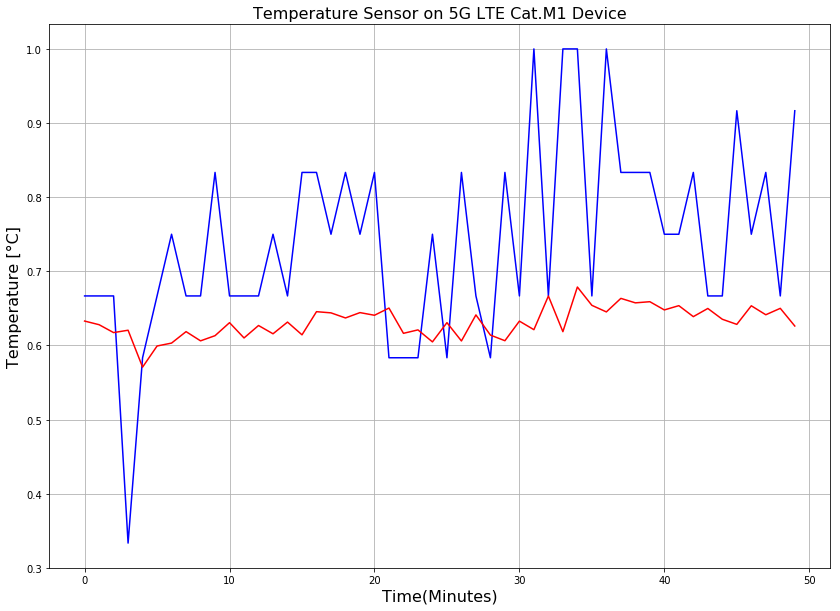

In [31]:
plt.figure(figsize=(14,10))
plt.plot(testY, c = 'blue')
plt.plot(testPredict, c =  'red')
plt.title("Temperature Sensor on 5G LTE Cat.M1 Device",fontsize=16)
plt.xlabel("Time(Minutes)",fontsize=16)
plt.ylabel("Temperature [°C]",fontsize=16)
plt.grid()
plt.show()

In [32]:
testPredict = scaler.inverse_transform(testPredict).ravel()

In [33]:
testPredict

array([27.866552, 27.838501, 27.777723, 27.796005, 27.511852, 27.67454 ,
       27.696966, 27.785162, 27.714228, 27.754011, 27.854128, 27.736485,
       27.83234 , 27.768547, 27.858658, 27.76055 , 27.938807, 27.929668,
       27.890503, 27.93162 , 27.9112  , 27.966667, 27.772093, 27.798607,
       27.706148, 27.854343, 27.713346, 27.913887, 27.758535, 27.715216,
       27.865976, 27.800186, 28.05925 , 27.784838, 28.128765, 27.987654,
       27.93699 , 28.04123 , 28.006718, 28.015594, 27.952234, 27.98514 ,
       27.900621, 27.963522, 27.880465, 27.841064, 27.984182, 27.915112,
       27.964537, 27.828514], dtype=float32)

In [34]:
trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((50,), (50,))

In [35]:
testPredict.shape,testTrue.shape,trainPredict.shape,trainTrue.shape

((50,), (50,), (113,), (113,))

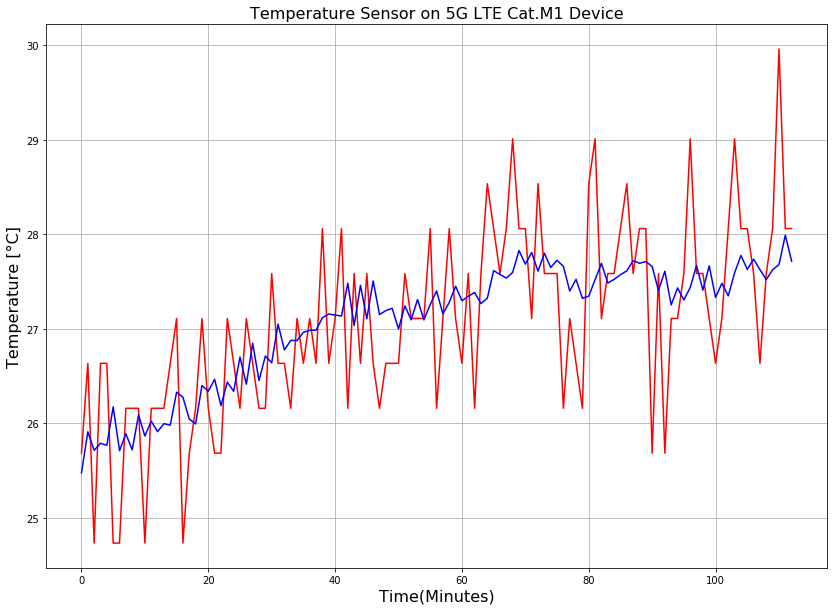

In [36]:
plt.figure(figsize=(14,10))
plt.plot(trainTrue, c = 'red')
plt.plot(trainPredict, c = 'blue')
plt.title("Temperature Sensor on 5G LTE Cat.M1 Device",fontsize=16)
plt.xlabel("Time(Minutes)",fontsize=16)
plt.ylabel("Temperature [°C]",fontsize=16)
plt.grid()
plt.show()

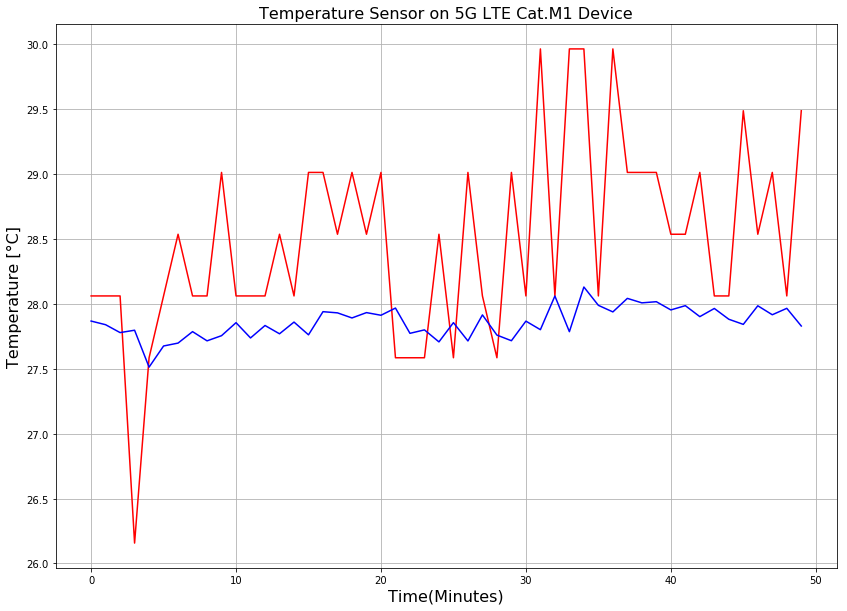

In [37]:
plt.figure(figsize=(14,10))
plt.plot(testTrue, c = 'red')
plt.plot(testPredict, c = 'blue')
plt.title("Temperature Sensor on 5G LTE Cat.M1 Device",fontsize=16)
plt.xlabel("Time(Minutes)",fontsize=16)
plt.ylabel("Temperature [°C]",fontsize=16)
plt.grid()
plt.show()

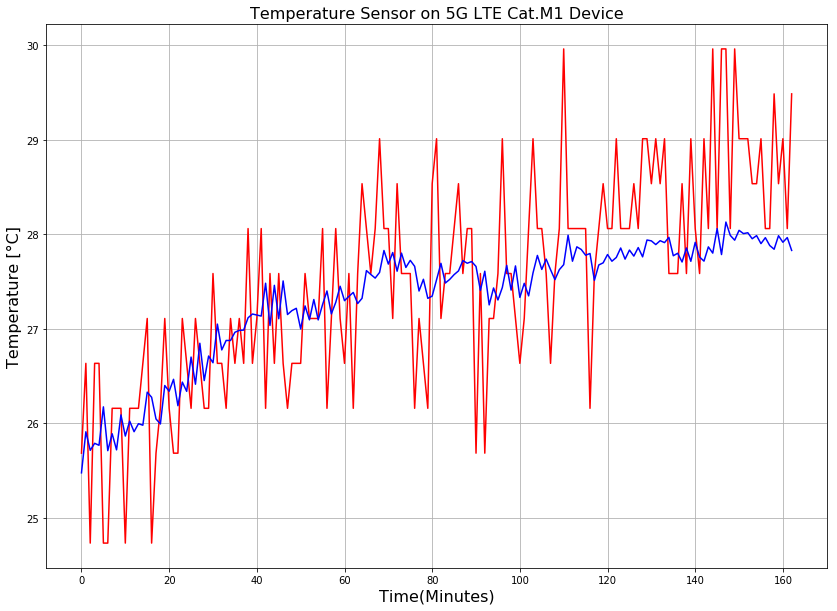

In [39]:
plt.figure(figsize=(14,10))
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'red')
plt.plot(combinedPredicted, c = 'blue')
plt.title("Temperature Sensor on 5G LTE Cat.M1 Device",fontsize=16)
plt.xlabel("Time(Minutes)",fontsize=16)
plt.ylabel("Temperature [°C]",fontsize=16)
plt.grid()
plt.show()

# References

* WIZnet IoT Shield for Arduino: https://github.com/Wiznet/wiznet-iot-shield-arduino-kr
* How to Install SQLite On Windows/ Linux / Mac OS X: http://www.codebind.com/sqlite/how-to-install-sqlite-on/
* SQLite Tutorial: https://www.tutorialspoint.com/sqlite/
* SQLite Quick Guide: https://www.tutorialspoint.com/sqlite/sqlite_quick_guide.htm
* SQLite - Python Tuotorial: https://www.tutorialspoint.com/sqlite/sqlite_python.htm
* SQLite - Python Quick Guide: https://github.com/leehaesung/SQLite-Python_Quick_Guide
* Get Started TensorFlow: https://www.tensorflow.org/get_started/get_started
* Kaggle: Kernel sample https://www.kaggle.com/rstogi896/rnn-for-beginners

In [ ]:
# END